<h1>Hand On Exam</h1>
<hr>
<h3>RALPH RICHMOND D. AMARILLO</h3>
<h3>BSIT-3B</h3>

<h6>
<strong>Data Visualization: Provide Visualization each Insights.</strong>
</h6>

In [55]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import seaborn as sns

In [56]:
crime = pd.read_csv('datasets\\chicago_2001_present.csv')

In [57]:
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,12131221,JD327000,08/10/2020 09:45:00 AM,015XX N DAMEN AVE,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,...,1.0,24.0,03,1162795.0,1909900.0,2020,05/17/2025 03:40:52 PM,41.908418,-87.677407,"(41.908417822, -87.67740693)"
3,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410193,13973682,JJ422722,09/20/2025 09:30:00 PM,060XX N ARTESIAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,40.0,2.0,07,1158892.0,1940132.0,2025,09/28/2025 03:42:59 PM,41.991457,-87.690912,"(41.99145724, -87.690912186)"
8410194,13973492,JJ422488,09/20/2025 11:30:00 PM,004XX N PEORIA ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,27.0,24.0,07,1170336.0,1902935.0,2025,09/28/2025 03:42:59 PM,41.889144,-87.649909,"(41.889143855, -87.649909004)"
8410195,13973306,JJ422245,09/20/2025 07:08:00 PM,107XX S PRAIRIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,True,...,9.0,49.0,08A,1179819.0,1833810.0,2025,09/28/2025 03:42:59 PM,41.699246,-87.617199,"(41.699245987, -87.61719874)"
8410196,13973002,JJ422001,09/20/2025 03:55:00 PM,034XX W 63RD ST,2024,NARCOTICS,POSSESS - HEROIN (WHITE),POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,14.0,66.0,18,1154582.0,1862632.0,2025,09/28/2025 03:42:59 PM,41.778877,-87.708840,"(41.778877155, -87.708840106)"


In [58]:
crime.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.410198e+06,8.410198e+06,8.410151e+06,7.795376e+06,7.796511e+06,8.316513e+06,8.316513e+06,8.410198e+06,8.316513e+06,8.316513e+06
mean,7.506417e+06,1.183592e+03,1.129624e+01,2.278485e+01,3.738321e+01,1.164655e+06,1.885910e+06,2.010984e+03,4.184253e+01,-8.767129e+01
std,3.776056e+06,7.037035e+02,6.963286e+00,1.385829e+01,2.154697e+01,1.695337e+04,3.243238e+04,7.057827e+00,8.923247e-02,6.143601e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,4.057425e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153071e+06,1.859206e+06,2.005000e+03,4.176894e+01,-8.771335e+01
50%,7.505136e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166207e+06,1.891022e+06,2.010000e+03,4.185656e+01,-8.766556e+01
75%,1.089433e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176401e+06,1.909404e+06,2.017000e+03,4.190708e+01,-8.762807e+01
max,1.398087e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.025000e+03,4.202291e+01,-8.752453e+01


In [59]:
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8410198.0,7.506417e+06,3.776056e+06,634.000000,4.057425e+06,7.505136e+06,1.089433e+07,1.398087e+07
Beat,8410198.0,1.183592e+03,7.037035e+02,111.000000,6.210000e+02,1.034000e+03,1.731000e+03,2.535000e+03
District,8410151.0,1.129624e+01,6.963286e+00,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,7795376.0,2.278485e+01,1.385829e+01,1.000000,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,7796511.0,3.738321e+01,2.154697e+01,0.000000,2.300000e+01,3.200000e+01,5.600000e+01,7.700000e+01
X Coordinate,8316513.0,1.164655e+06,1.695337e+04,0.000000,1.153071e+06,1.166207e+06,1.176401e+06,1.205119e+06
Y Coordinate,8316513.0,1.885910e+06,3.243238e+04,0.000000,1.859206e+06,1.891022e+06,1.909404e+06,1.951622e+06
Year,8410198.0,2.010984e+03,7.057827e+00,2001.000000,2.005000e+03,2.010000e+03,2.017000e+03,2.025000e+03
Latitude,8316513.0,4.184253e+01,8.923247e-02,36.619446,4.176894e+01,4.185656e+01,4.190708e+01,4.202291e+01
Longitude,8316513.0,-8.767129e+01,6.143601e-02,-91.686566,-8.771335e+01,-8.766556e+01,-8.762807e+01,-8.752453e+01


In [60]:
crime.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
dtype: int64

In [61]:
crime.info

<bound method DataFrame.info of                ID Case Number                    Date  \
0        13311263    JG503434  07/29/2022 03:39:00 AM   
1        13053066    JG103252  01/03/2023 04:44:00 PM   
2        12131221    JD327000  08/10/2020 09:45:00 AM   
3        11227634    JB147599  08/26/2017 10:00:00 AM   
4        13203321    JG415333  09/06/2023 05:00:00 PM   
...           ...         ...                     ...   
8410193  13973682    JJ422722  09/20/2025 09:30:00 PM   
8410194  13973492    JJ422488  09/20/2025 11:30:00 PM   
8410195  13973306    JJ422245  09/20/2025 07:08:00 PM   
8410196  13973002    JJ422001  09/20/2025 03:55:00 PM   
8410197  13972730    JJ421679  09/20/2025 08:20:00 AM   

                           Block  IUCR                Primary Type  \
0                023XX S TROY ST  1582  OFFENSE INVOLVING CHILDREN   
1        039XX W WASHINGTON BLVD  2017                   NARCOTICS   
2              015XX N DAMEN AVE  0326                     ROBBERY   
3  

In [62]:
crime['Date'] = crime['Date'].astype(str)
crime['Date'] = crime['Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
crime['Date'] = crime['Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)                                
crime['Date'] = pd.to_datetime(crime['Date'], dayfirst=True, errors='coerce')

crime.dtypes
crime.isnull().sum()

crime['Year'] = crime['Date'].dt.year
crime['Month'] =  crime['Date'].dt.month
crime['Day'] =  crime['Date'].dt.day
crime['DayOfWeek'] =  crime['Date'].dt.dayofweek
crime.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
Month                        0
Day                          0
DayOfWeek                    0
dtype: int64

In [9]:
crime['Date'] = crime['Date'].astype('str')
crime['Date'] = crime['Date'].str.strip()
crime['Date'] = crime['Date'].str.replace('/', '-')

In [10]:
crime['Date'] = pd.to_datetime(crime['Date'], dayfirst = True, errors = 'coerce')

In [11]:
crime.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

In [12]:
severity3 = crime.groupby(['Primary Type', 'Year']).size()
severity3.reset_index()

,Primary Type,Year,0
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
763,WEAPONS VIOLATION,2021,8979
764,WEAPONS VIOLATION,2022,8781
765,WEAPONS VIOLATION,2023,8608
766,WEAPONS VIOLATION,2024,7839


<h2>INSIGHTS : 35</h2>

<h2>Question 1: Which year had the most reported crimes?</h2>

In [13]:
crimes_per_year = crime.groupby('Year').size().reset_index(name='Total Crimes')
crimes_per_year.sort_values('Total Crimes', ascending=False)

,Year,Total Crimes
1,2002,486830
0,2001,485954
2,2003,475996
3,2004,469439
4,2005,453785
5,2006,448198
6,2007,437105
7,2008,427211
8,2009,392859
9,2010,370555


<hr>
<h2>Question 2: Which month shows the highest concentration of crimes across all years?</h2>

In [14]:
crimes_per_month = crime.groupby('Month').size().reset_index(name='Total Crimes')
crimes_per_month.sort_values('Total Crimes', ascending=False)

,Month,Total Crimes
6,7,787986
7,8,778827
5,6,748862
4,5,748780
8,9,727097
9,10,722062
2,3,691342
3,4,688252
0,1,661245
10,11,650342


<hr>
<h2>Question 3: On which day of the week are crimes most frequently reported?</h2>

In [15]:
crimes_per_day = crime.groupby('DayOfWeek').size().reset_index(name='Total Crimes')
crimes_per_day.sort_values('Total Crimes', ascending=False)

,DayOfWeek,Total Crimes
4,4,1261341
2,2,1208169
5,5,1206357
1,1,1200628
3,3,1196290
0,0,1189517
6,6,1147896


<hr>
<h2>Question 4: What are the top 10 most frequently reported crime types in Chicago?</h2>

In [16]:
common_crimes = crime.groupby('Primary Type').size().reset_index(name='Total Crimes')
common_crimes.sort_values('Total Crimes', ascending=False).head(10)

,Primary Type,Total Crimes
32,THEFT,1785150
2,BATTERY,1532491
6,CRIMINAL DAMAGE,956346
19,NARCOTICS,763342
1,ASSAULT,563123
24,OTHER OFFENSE,524325
3,BURGLARY,444757
18,MOTOR VEHICLE THEFT,429681
9,DECEPTIVE PRACTICE,387055
29,ROBBERY,314286


<hr>
<h2>Question 5: How many crimes resulted in an arrest compared to those that did not?</h2>

In [17]:
arrest_counts = crime.groupby('Arrest').size().reset_index(name='Total Cases')
arrest_counts

,Arrest,Total Cases
0,False,6287066
1,True,2123132


<hr>
<h2>Question 6: Which 10 locations report the most crime incidents?</h2>

In [18]:
crime_locations = crime.groupby('Location Description').size().reset_index(name='Total Crimes')
crime_locations.sort_values('Total Crimes', ascending=False).head(10)

,Location Description,Total Crimes
190,STREET,2197287
161,RESIDENCE,1381812
17,APARTMENT,998492
185,SIDEWALK,761765
141,OTHER,269939
149,PARKING LOT/GARAGE(NON.RESID.),202930
15,ALLEY,187348
186,SMALL RETAIL STORE,168926
182,"SCHOOL, PUBLIC, BUILDING",146368
168,RESTAURANT,141262


<hr>
<h2>Question 7: Which crime types are most likely to result in an arrest?</h2>

In [19]:
arrest_by_type = crime.groupby('Primary Type')['Arrest'].mean().reset_index(name='Arrest Rate')
arrest_by_type.sort_values('Arrest Rate', ascending=False).head(10)

,Primary Type,Arrest Rate
10,DOMESTIC VIOLENCE,1.000000
25,PROSTITUTION,0.995583
19,NARCOTICS,0.993468
11,GAMBLING,0.992703
17,LIQUOR LAW VIOLATION,0.990115
26,PUBLIC INDECENCY,0.981395
4,CONCEALED CARRY LICENSE VIOLATION,0.965707
14,INTERFERENCE WITH PUBLIC OFFICER,0.916336
21,OBSCENITY,0.738947
33,WEAPONS VIOLATION,0.725967


<hr>
<h2>Question 8: What is the distribution of crimes across different times of the day?</h2>

In [20]:
crime['Hour'] = crime['Date'].dt.hour
hourly_trends = crime.groupby('Hour').size().reset_index(name='Total Crimes')
hourly_trends

,Hour,Total Crimes
0,0,490142
1,1,267704
2,2,226631
3,3,184422
4,4,141052
5,5,118313
6,6,136726
7,7,193660
8,8,284850
9,9,362414


<hr>
<h2>Question 9: Which locations are more likely to have domestic-related crimes?</h2>

In [21]:
domestic_locations = crime[crime['Domestic'] == True].groupby('Location Description').size().reset_index(name='Domestic Crimes')
domestic_locations.sort_values('Domestic Crimes', ascending=False).head(10)

,Location Description,Domestic Crimes
126,RESIDENCE,529034
17,APARTMENT,469727
152,STREET,179492
147,SIDEWALK,83457
130,RESIDENCE PORCH/HALLWAY,22517
112,OTHER,18737
36,CHA APARTMENT,17562
165,VEHICLE NON-COMMERCIAL,16951
15,ALLEY,16566
120,PARKING LOT/GARAGE(NON.RESID.),10278


<hr>
<h2>Question 10: Which FBI crime codes are reported most frequently in Chicago?</h2>

In [22]:
fbi_crimes = crime['FBI Code'].value_counts().head(10).reset_index()
fbi_crimes.columns = ['FBI Code', 'Number of Crimes']
fbi_crimes

,FBI Code,Number of Crimes
0,06,1788058
1,08B,1316358
2,14,956346
3,18,762366
4,26,604360
5,08A,575660
6,05,441849
7,07,429681
8,11,334668
9,03,314286


<hr>
<h2>Question 11: Based on the dataset, which month recorded the highest number of crimes, and what are the Top 3 most common crime types in that month?</h2>

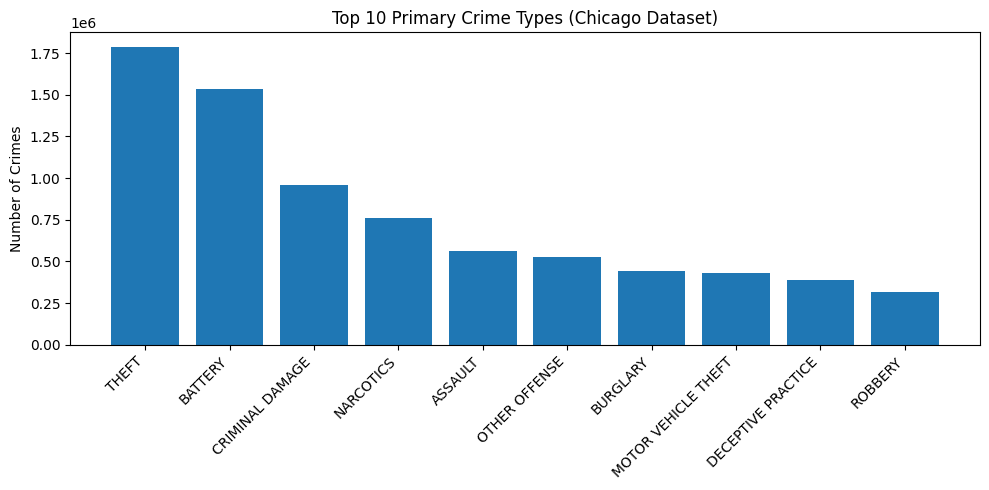

In [23]:
top_types = crime['Primary Type'].value_counts().head(10).reset_index()
top_types.columns = ['Primary Type', 'Count']
plt.figure(figsize=(10,5))
plt.bar(top_types['Primary Type'], top_types['Count'])
plt.title('Top 10 Primary Crime Types (Chicago Dataset)')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<hr>
<h2>Question 12: What is the most common crime type in each major location, and which locations experience the highest counts of their dominant crime type?</h2>

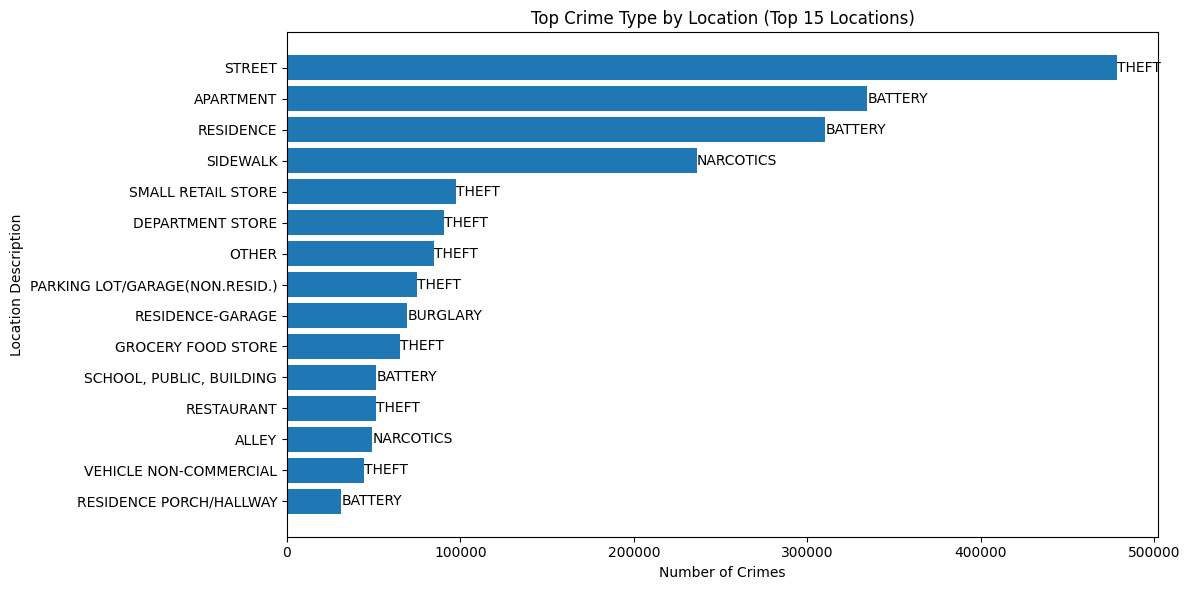

In [24]:
crime_by_location = crime.groupby(['Location Description', 'Primary Type']).size().reset_index(name='Count')

top_crime_per_location = crime_by_location.loc[crime_by_location.groupby('Location Description')['Count'].idxmax()]

top_crime_per_location = top_crime_per_location.sort_values(by='Count', ascending=False).head(15)

plt.figure(figsize=(12,6))
plt.barh(top_crime_per_location['Location Description'], top_crime_per_location['Count'])
for i, (ptype, count) in enumerate(zip(top_crime_per_location['Primary Type'], top_crime_per_location['Count'])):
    plt.text(count, i, f"{ptype}", va='center')
plt.title("Top Crime Type by Location (Top 15 Locations)")
plt.xlabel("Number of Crimes")
plt.ylabel("Location Description")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<hr>
<h2>Question 13: How do trends in Motor Vehicle Theft compare with Burglary and Theft over time? Do they rise and fall together, or does vehicle theft follow a unique pattern? </h2>

In [25]:
vehicle_vs_property = crime[crime['Primary Type'].isin(['MOTOR VEHICLE THEFT','BURGLARY','THEFT'])]

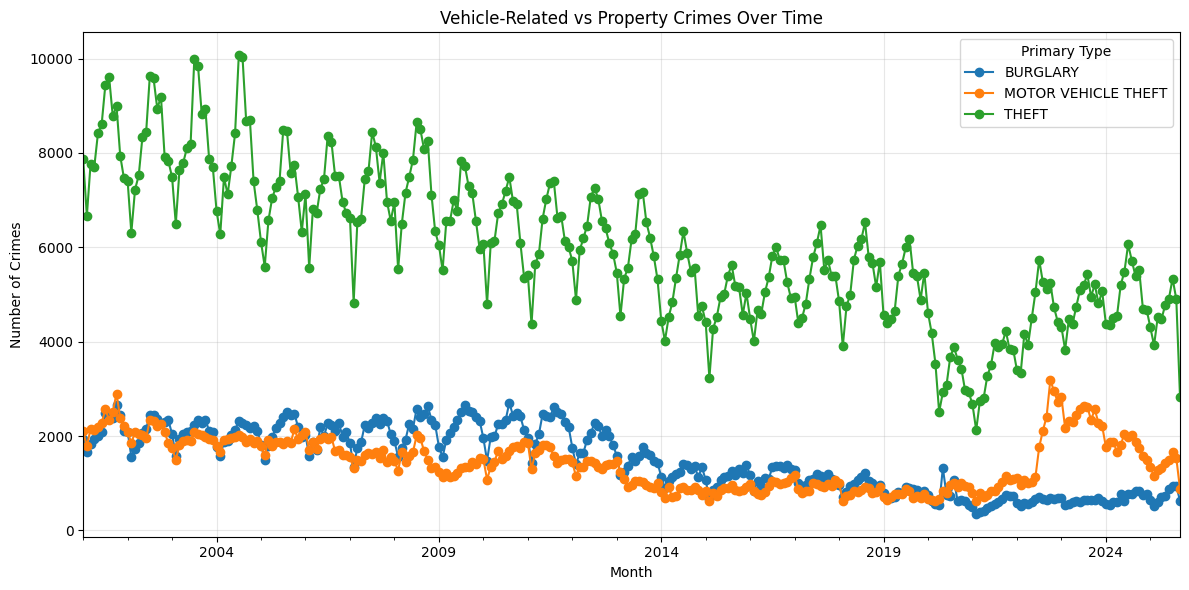

In [26]:
crime_trend = vehicle_vs_property.groupby([vehicle_vs_property['Date'].dt.to_period('M'), 'Primary Type']).size().unstack(fill_value=0)
crime_trend.index = crime_trend.index.to_timestamp()

crime_trend.plot(figsize=(12,6), marker='o')
plt.title("Vehicle-Related vs Property Crimes Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<hr>
<h2>Question 14: Which crimes are most likely to lead to an arrest, and which ones are least likely? </h2>

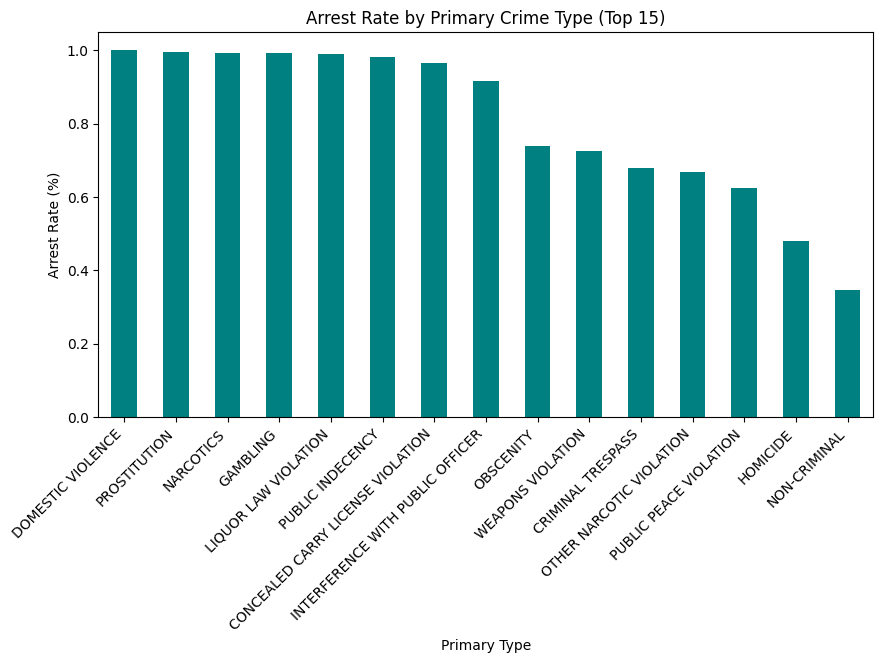

In [27]:
arrest_rate = crime.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
arrest_rate.plot(kind='bar', color='teal')
plt.title("Arrest Rate by Primary Crime Type (Top 15)")
plt.ylabel("Arrest Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.show()

<hr>
<h2>Question 15: At what time of day do most crimes occur, and when are crimes least frequent? </h2>

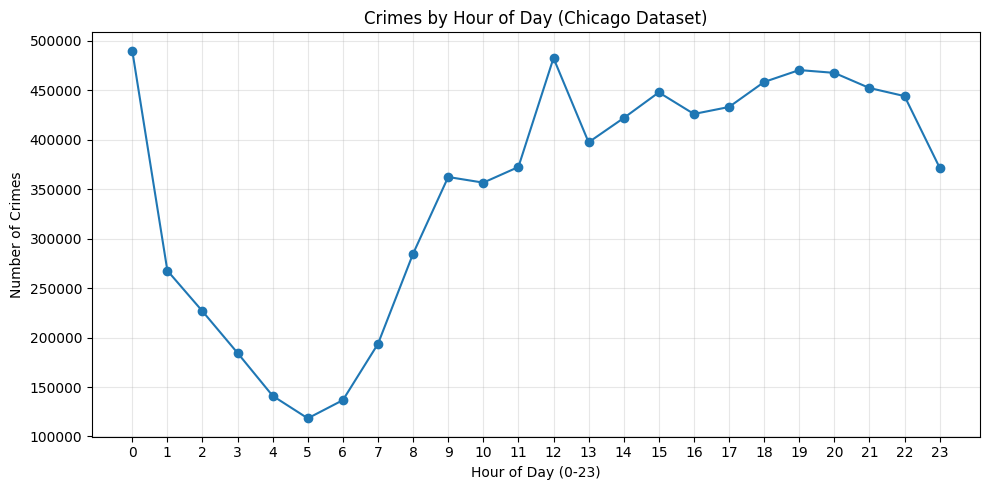

In [28]:
crimes_by_hour = crime['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(crimes_by_hour.index, crimes_by_hour.values, marker='o')
plt.title("Crimes by Hour of Day (Chicago Dataset)")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

<hr>
<h2>Question 16: Has the proportion of arrests for crimes missing Community Area changed over the years? </h2>

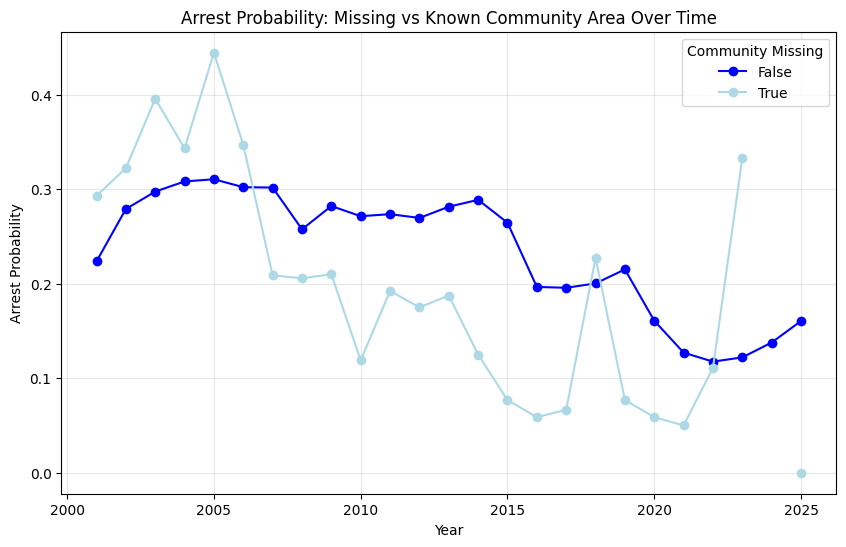

In [29]:
crime['Community Missing'] = crime['Community Area'].isnull()
trend = crime.groupby(['Year','Community Missing'])['Arrest'].mean().unstack()

trend.plot(marker='o', figsize=(10,6), color=["Blue","lightblue"])
plt.title("Arrest Probability: Missing vs Known Community Area Over Time")
plt.ylabel("Arrest Probability")
plt.grid(alpha=0.3)
plt.show()

<hr>
<h2>Question 17: Which blocks recorded the most Motor Vehicle Thefts? </h2>

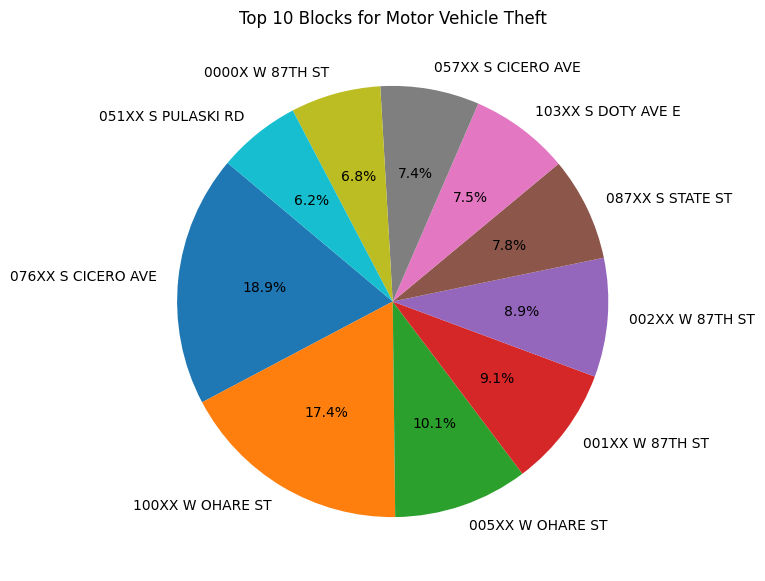

In [30]:
mvt_blocks = crime[crime['Primary Type'] == 'MOTOR VEHICLE THEFT']['Block'].value_counts().head(10)
plt.figure(figsize=(7,7))
plt.pie(mvt_blocks, labels=mvt_blocks.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Blocks for Motor Vehicle Theft")
plt.show()

<hr>
<h2>Question 18: Which FBI Code recorded the most Human Trafficking cases? </h2>

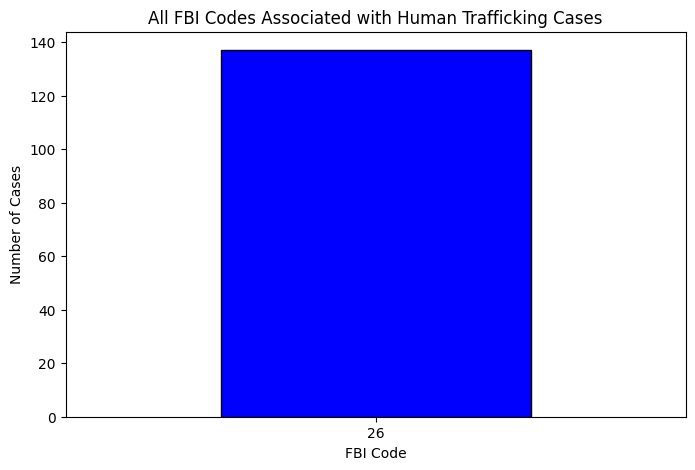

FBI Code
26    137
Name: count, dtype: int64


In [31]:
ht_fbi = crime[crime['Primary Type'] == 'HUMAN TRAFFICKING']['FBI Code'].value_counts()

plt.figure(figsize=(8,5))
ht_fbi.plot(kind='bar', color="blue", edgecolor="black")

plt.title("All FBI Codes Associated with Human Trafficking Cases")
plt.xlabel("FBI Code")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.show()

print(ht_fbi)

<hr>
<h2>Question 19: Which crime types most often happen in Hotels and Motels?</h2>

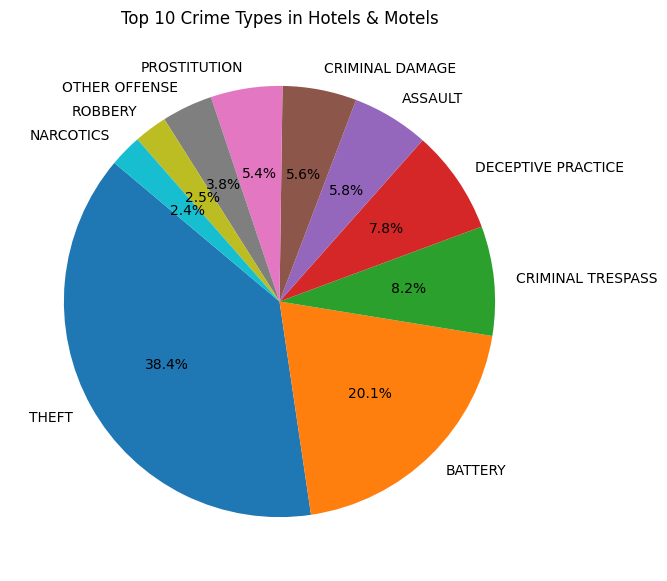

In [32]:
hotel_motel_crimes = crime[crime['Location Description'].str.contains("HOTEL|MOTEL", na=False)]

hotel_motel_types = hotel_motel_crimes['Primary Type'].value_counts().head(10)

plt.figure(figsize=(7,7))
plt.pie(hotel_motel_types, labels=hotel_motel_types.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Crime Types in Hotels & Motels")
plt.show()

<hr>
<h2>Question 20: Which crimes are the least frequent in Chicago?</h2>

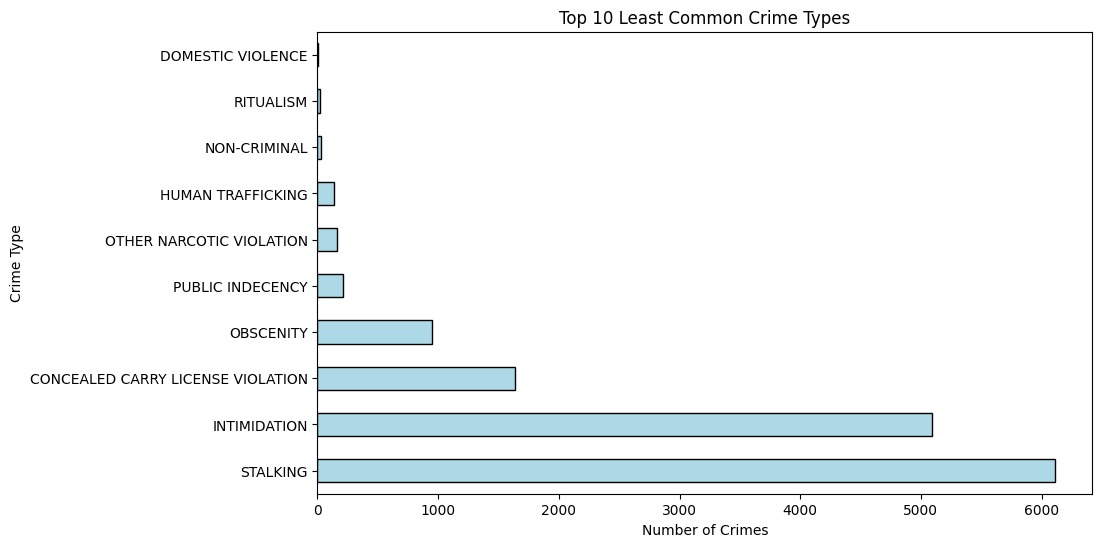

Rarest Crime Types in Dataset:
Primary Type
STALKING                             6115
INTIMIDATION                         5088
CONCEALED CARRY LICENSE VIOLATION    1633
OBSCENITY                             950
PUBLIC INDECENCY                      215
OTHER NARCOTIC VIOLATION              163
HUMAN TRAFFICKING                     137
NON-CRIMINAL                           26
RITUALISM                              24
DOMESTIC VIOLENCE                       1
Name: count, dtype: int64


In [33]:
least_crimes = crime['Primary Type'].value_counts().tail(10)

plt.figure(figsize=(10,6))
least_crimes.plot(kind='barh', color="lightblue", edgecolor="black")
plt.title("Top 10 Least Common Crime Types")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

print("Rarest Crime Types in Dataset:")
print(least_crimes)

<hr>
<h2>Question 21: How have crimes in Block 023XX S TROY ST changed from 2001 to 2025?</h2>

In [34]:
S_TROY_ST_crime = crime[crime['Block'] == '023XX S TROY ST']

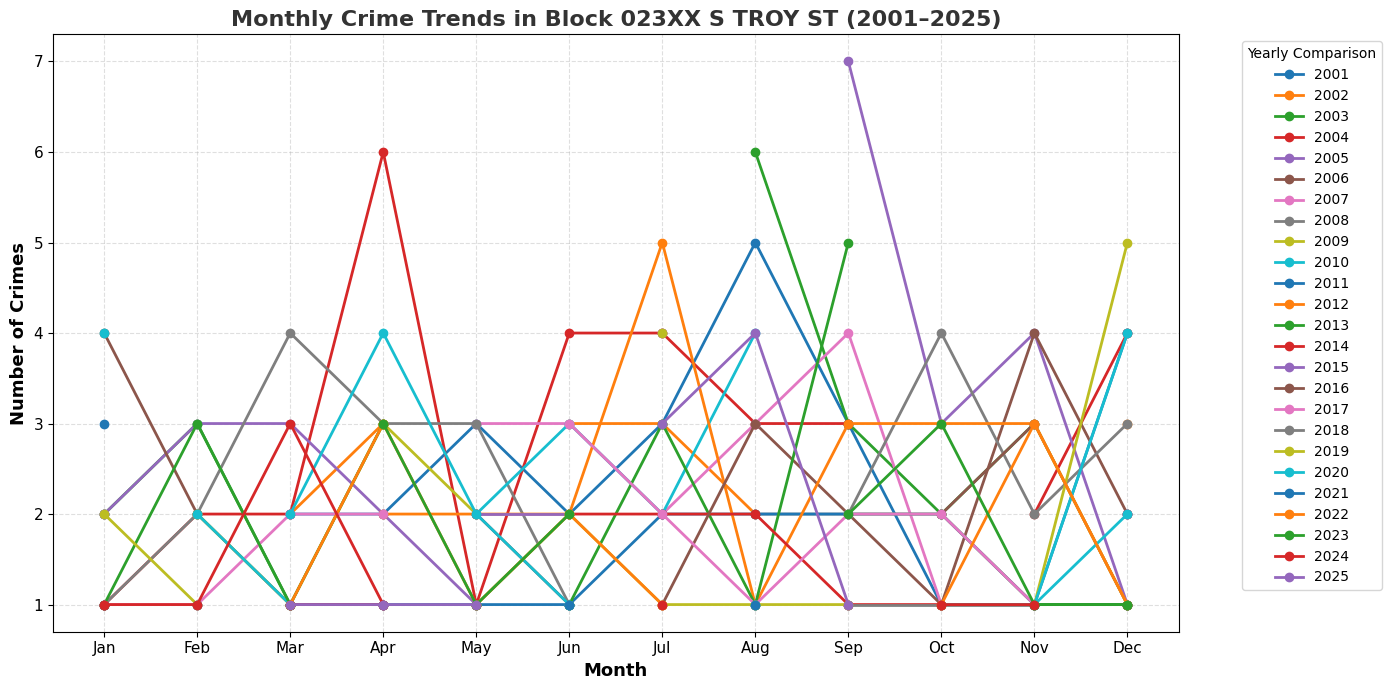

In [47]:
monthly_londondata = S_TROY_ST_crime.groupby(['Year', 'Month']).size()
monthly_londondata = monthly_londondata.unstack(level=0)

plt.figure(figsize=(14,7))
for col in monthly_londondata.columns:
    plt.plot(monthly_londondata.index, monthly_londondata[col],
             marker='o', linewidth=2, markersize=6, label=col)

plt.xticks(
    range(1, 13),
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    fontsize=11
)
plt.yticks(fontsize=11)

plt.title('Monthly Crime Trends in Block 023XX S TROY ST (2001–2025)', 
          fontsize=16, weight='bold', color='#333333')
plt.xlabel("Month", fontsize=13, weight='bold')
plt.ylabel("Number of Crimes", fontsize=13, weight='bold')

plt.legend(title='Yearly Comparison', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=10)
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

In [67]:
S_TROY_ST_crime = S_TROY_ST_crime.dropna(subset=['Latitude','Longitude'])

locations = list(zip(S_TROY_ST_crime['Latitude'], S_TROY_ST_crime['Longitude']))

m = folium.Map(location=[S_TROY_ST_crime['Latitude'].mean(), S_TROY_ST_crime['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)

m.save('crime_heatmap.html')
m

<hr>
<h2>Question 22: What changes in crime patterns can be observed in Block 001XX W RANDOLPH ST from 2001 to 2025?</h2>

In [63]:
W_RANDOLPH_ST_crime = crime[crime['Block'] == '001XX W RANDOLPH ST']

In [64]:
colors = ['#ff99c8','#fcf6bd','#d0f4de','#a9def9','#e4c1f9','#fbc4ab','#b5ead7','#c7ceea']

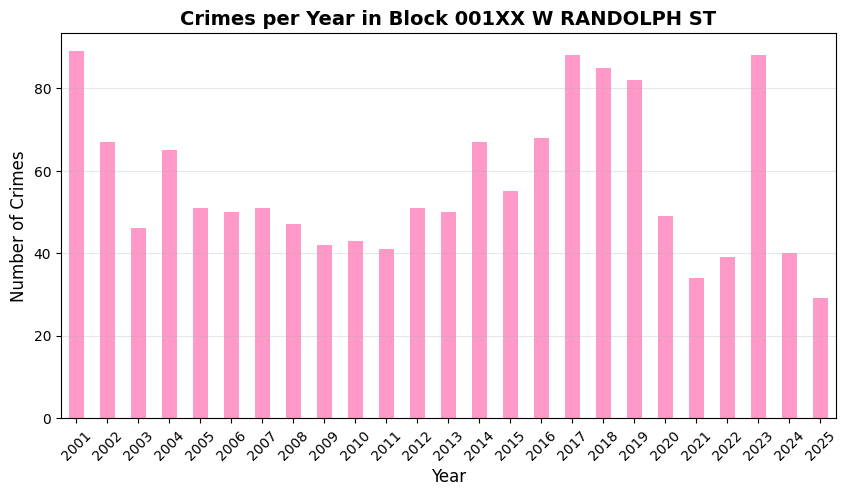

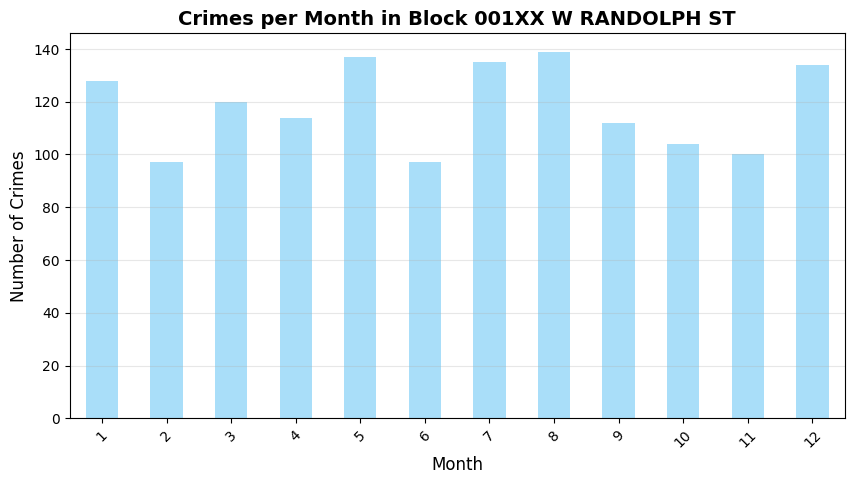

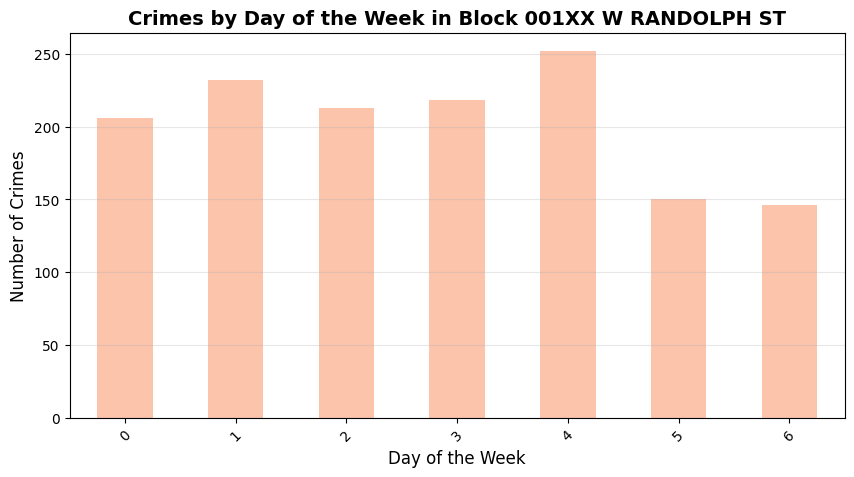

In [69]:
crime_per_year = W_RANDOLPH_ST_crime['Year'].value_counts().sort_index()
crime_per_month = W_RANDOLPH_ST_crime['Month'].value_counts().sort_index()
crime_per_day = W_RANDOLPH_ST_crime['DayOfWeek'].value_counts().sort_index()

plt.figure(figsize=(10,5))
crime_per_year.plot(kind='bar', color=colors[0])
plt.title('Crimes per Year in Block 001XX W RANDOLPH ST', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()

# --- Crimes per Month ---
plt.figure(figsize=(10,5))
crime_per_month.plot(kind='bar', color=colors[3])
plt.title('Crimes per Month in Block 001XX W RANDOLPH ST', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()

# --- Crimes per Day of Week ---
plt.figure(figsize=(10,5))
crime_per_day.plot(kind='bar', color=colors[5])
plt.title('Crimes by Day of the Week in Block 001XX W RANDOLPH ST', fontsize=14, weight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()

In [70]:
W_RANDOLPH_ST_crime = W_RANDOLPH_ST_crime.dropna(subset=['Latitude','Longitude'])

locations = list(zip(W_RANDOLPH_ST_crime['Latitude'], W_RANDOLPH_ST_crime['Longitude']))

m = folium.Map(location=[W_RANDOLPH_ST_crime['Latitude'].mean(), W_RANDOLPH_ST_crime['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)

m.save('crime_heatmap.html')
m

<hr>
<h2>Question 23: In Block 087XX S BURLEY AVE, during which month do crimes most often occur from 2001 to 2025?</h2>

In [71]:
S_BURLEY_AVE_crime = crime[crime['Block'] == '087XX S BURLEY AVE']

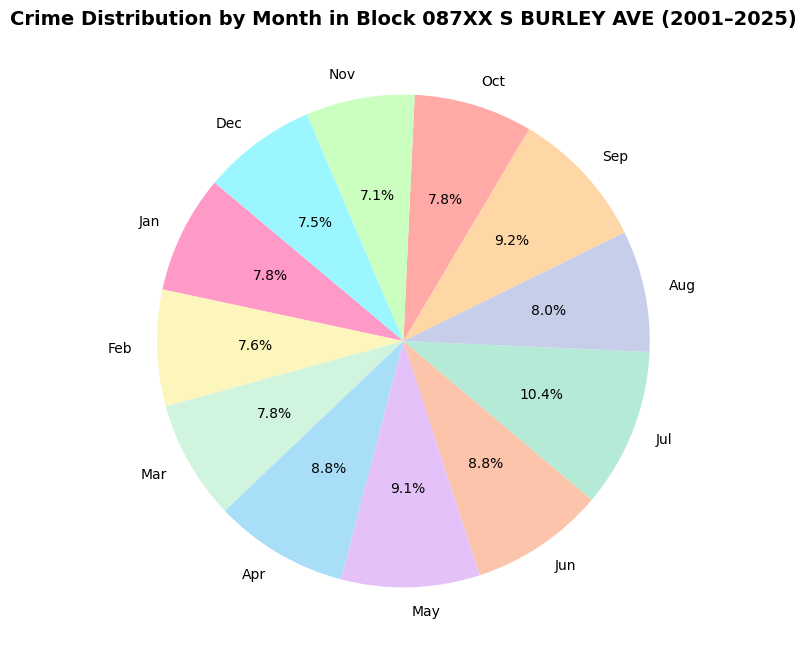

In [72]:
monthly_totals = S_BURLEY_AVE_crime.groupby('Month').size()

# --- Month labels
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_totals.index = monthly_totals.index.map(lambda x: month_names[x-1])

# --- Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    monthly_totals,
    labels=monthly_totals.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff99c8','#fcf6bd','#d0f4de','#a9def9',
            '#e4c1f9','#fbc4ab','#b5ead7','#c7ceea',
            '#ffd6a5','#ffaaa7','#caffbf','#9bf6ff']
)

plt.title('Crime Distribution by Month in Block 087XX S BURLEY AVE (2001–2025)', 
          fontsize=14, weight='bold')
plt.show()

In [73]:
S_BURLEY_AVE_crime = S_BURLEY_AVE_crime.dropna(subset=['Latitude','Longitude'])

locations = list(zip(S_BURLEY_AVE_crime['Latitude'], S_BURLEY_AVE_crime['Longitude']))

m = folium.Map(location=[S_BURLEY_AVE_crime['Latitude'].mean(), S_BURLEY_AVE_crime['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)

m.save('crime_heatmap.html')
m

<hr>
<h2>Question 24: Which time frame shows the highest crime frequency in Block 107XX S PRAIRIE AVE (2001–2025)</h2>

In [74]:
S_PRAIRIE_AVE_crime = crime[crime['Block'] == '107XX S PRAIRIE AVE']

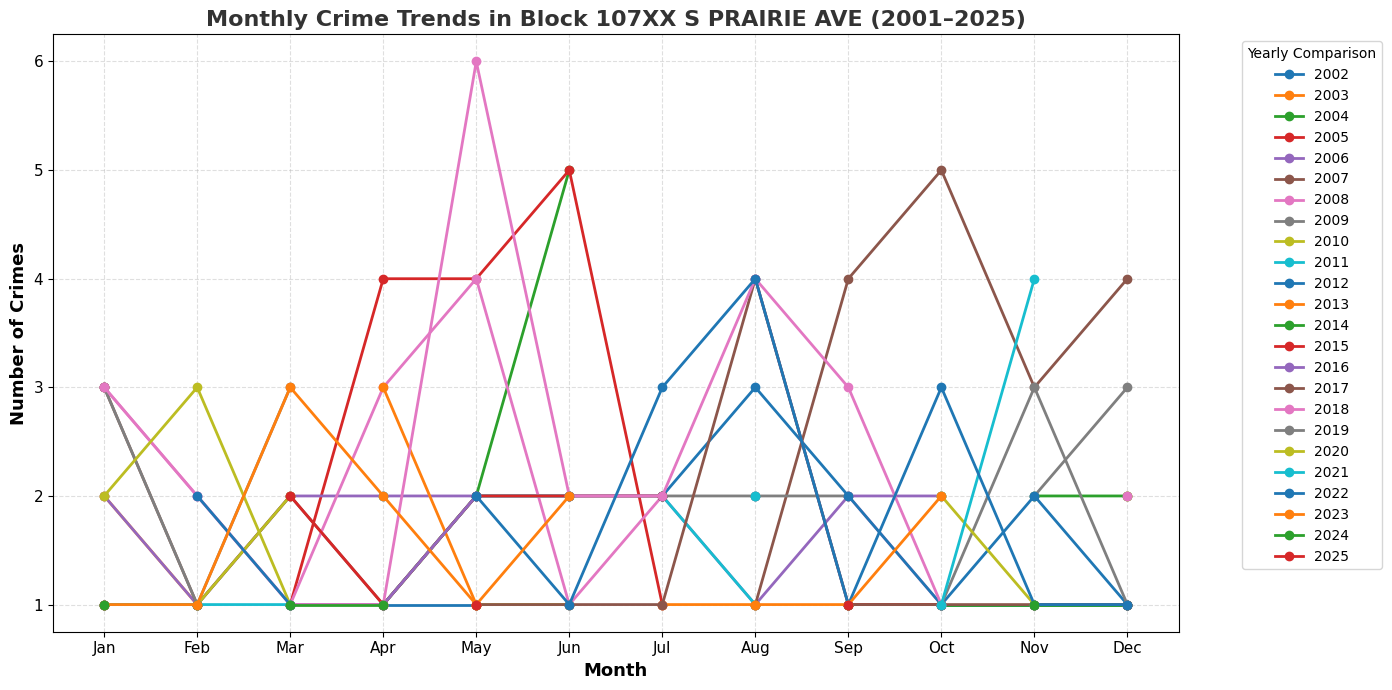

In [75]:
monthly_londondata = S_PRAIRIE_AVE_crime.groupby(['Year', 'Month']).size()
monthly_londondata = monthly_londondata.unstack(level=0)

plt.figure(figsize=(14,7))
for col in monthly_londondata.columns:
    plt.plot(monthly_londondata.index, monthly_londondata[col],
             marker='o', linewidth=2, markersize=6, label=col)

plt.xticks(
    range(1, 13),
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    fontsize=11
)
plt.yticks(fontsize=11)

plt.title('Monthly Crime Trends in Block 107XX S PRAIRIE AVE (2001–2025)', 
          fontsize=16, weight='bold', color='#333333')
plt.xlabel("Month", fontsize=13, weight='bold')
plt.ylabel("Number of Crimes", fontsize=13, weight='bold')

plt.legend(title='Yearly Comparison', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=10)
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

In [76]:
S_PRAIRIE_AVE_crime = S_PRAIRIE_AVE_crime.dropna(subset=['Latitude','Longitude'])

locations = list(zip(S_PRAIRIE_AVE_crime['Latitude'], S_PRAIRIE_AVE_crime['Longitude']))

m = folium.Map(location=[S_PRAIRIE_AVE_crime['Latitude'].mean(), S_PRAIRIE_AVE_crime['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)

m.save('crime_heatmap.html')
m

<hr>
<h2>Question 25: What changes in crime frequency and patterns occurred in Block 034XX W 63RD ST during 2001–2025</h2>

In [77]:
W_sixtree_ST_crime = crime[crime['Block'] == '034XX W 63RD ST']

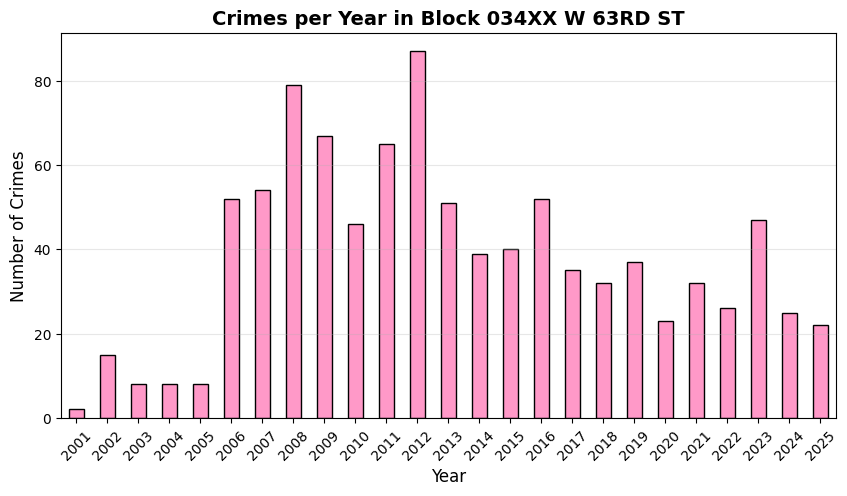

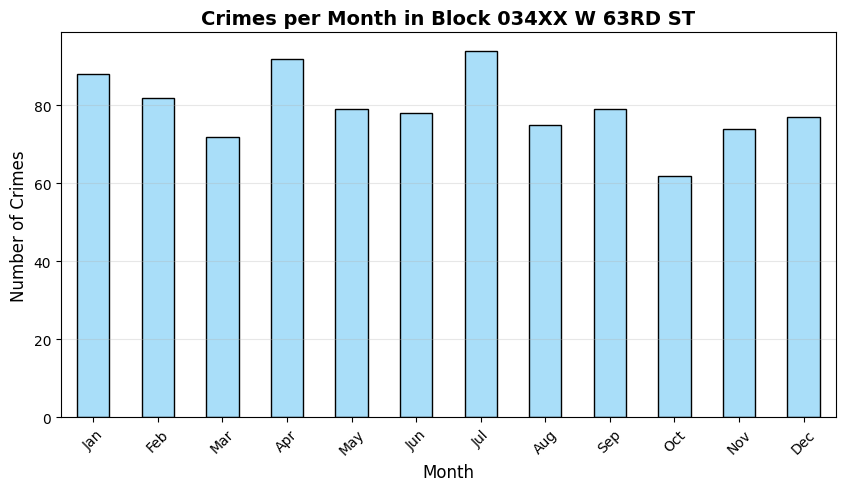

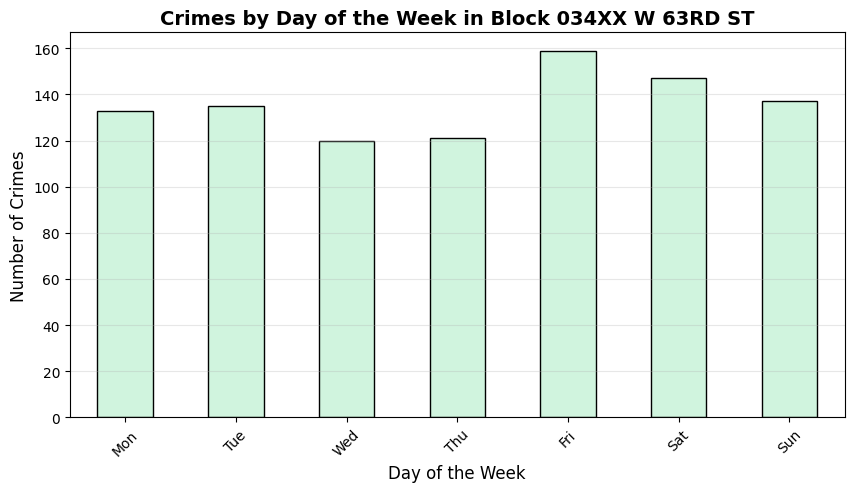

In [78]:
crime_per_year = W_sixtree_ST_crime['Year'].value_counts().sort_index()
crime_per_month = W_sixtree_ST_crime['Month'].value_counts().sort_index()
crime_per_day = W_sixtree_ST_crime['DayOfWeek'].value_counts().sort_index()

plt.figure(figsize=(10,5))
crime_per_year.plot(kind='bar', color='#ff99c8', edgecolor='black')
plt.title('Crimes per Year in Block 034XX W 63RD ST', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()

month_names = {
    1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
    7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
}
crime_per_month.index = crime_per_month.index.map(month_names)

plt.figure(figsize=(10,5))
crime_per_month.plot(kind='bar', color='#a9def9', edgecolor='black')
plt.title('Crimes per Month in Block 034XX W 63RD ST', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()

day_names = {
    0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'
}
crime_per_day.index = crime_per_day.index.map(day_names)

plt.figure(figsize=(10,5))
crime_per_day.plot(kind='bar', color='#d0f4de', edgecolor='black')
plt.title('Crimes by Day of the Week in Block 034XX W 63RD ST', fontsize=14, weight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()

In [79]:
W_sixtree_ST_crime = W_sixtree_ST_crime.dropna(subset=['Latitude','Longitude'])

locations = list(zip(W_sixtree_ST_crime['Latitude'], W_sixtree_ST_crime['Longitude']))

m = folium.Map(location=[W_sixtree_ST_crime['Latitude'].mean(), W_sixtree_ST_crime['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)

m.save('crime_heatmap.html')
m

<hr>
<h2>Question 26: Which NARCOTICS crimes occurred in Ward 20?</h2>

In [80]:
crime.loc[(crime['Primary Type'] == 'NARCOTICS') & (crime['Ward'] == 20), 
       ['Case Number', 'Date', 'Block', 'Description']]

,Case Number,Date,Block,Description
466,JG413494,2023-09-06 12:30:00,052XX S RACINE AVE,POSSESS - HEROIN (WHITE)
1073,JG415134,2023-09-07 15:21:00,050XX S JUSTINE ST,POSSESS - CRACK
1772,HX369977,2014-08-01 19:42:00,001XX E 60TH ST,MANU/DEL:CANNABIS 10GM OR LESS
2044,JG416906,2023-09-08 20:29:00,063XX S WENTWORTH AVE,POSSESS - CRACK
2393,JG416963,2023-09-08 22:15:00,061XX S KIMBARK AVE,POSSESS - HALLUCINOGENS
...,...,...,...,...
8404978,HY150571,2015-02-13 16:21:00,003XX W 64TH ST,FOUND SUSPECT NARCOTICS
8408243,JJ419828,2025-09-18 20:45:00,046XX S WENTWORTH AVE,POSSESS - HEROIN (WHITE)
8409347,JJ420527,2025-09-19 13:28:00,005XX E 51ST ST,POSSESS - CANNABIS MORE THAN 30 GRAMS
8409415,JJ420578,2025-09-19 14:00:00,0000X E 57TH ST,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS


<hr>
<h2>Question 27: Show all crimes reported with missing District values?</h2>

In [81]:
crime.loc[crime['District'].isna(), 
       ['Case Number', 'Date', 'Primary Type', 'Block']]

,Case Number,Date,Primary Type,Block
1841423,HK665352,2004-06-26 10:00:00,DECEPTIVE PRACTICE,007XX E GRAND AVE
1849050,HK687767,2004-10-14 15:41:00,BURGLARY,002XX N BREAKWATER ACCESS
2313261,HL727137,2005-11-10 10:10:00,OTHER OFFENSE,010XX E GRAND AVE
2632493,HM342814,2006-05-10 19:40:00,BATTERY,006XX E RANDOLPH ST
3438399,HP461051,2008-07-18 20:00:00,CRIMINAL DAMAGE,010XX N SPRINGFIELD AVE
3451734,HP640590,2008-10-21 20:15:00,PROSTITUTION,0000X S KENTON AVE
3451981,HP623183,2008-10-11 15:00:00,MOTOR VEHICLE THEFT,014XX N ASHLAND AVE
3452038,HP620420,2008-10-10 23:57:00,ASSAULT,003XX E 59TH ST
3453214,HP650433,2008-10-17 12:00:00,THEFT,019XX N LINCOLN PARK WEST
3455954,HP645995,2008-10-24 17:45:00,CRIMINAL DAMAGE,057XX W POTOMAC AVE


<hr>
<h2>Question 28: Which crimes happened in 2010 with FBI Code 06 (Theft)?</h2>

In [82]:
crime.loc[(crime['Year'] == 2010) & (crime['FBI Code'] == '06'), 
       ['Case Number', 'Date', 'Block', 'Primary Type']]

,Case Number,Date,Block,Primary Type
70144,HS382705,2010-06-27 19:15:00,010XX W MONTANA ST,THEFT
71730,HT119411,2010-12-27 09:00:00,009XX N LAKE SHORE DR,THEFT
79316,JG547362,2010-06-22 00:01:00,085XX S RHODES AVE,THEFT
85146,HS105185,2010-01-04 18:00:00,012XX W 111TH PL,THEFT
86316,HS334479,2010-05-30 13:00:00,115XX S MARSHFIELD AVE,THEFT
...,...,...,...,...
7738498,HS521440,2010-09-18 10:59:00,031XX W 26TH ST,THEFT
7748585,HS453773,2010-07-08 09:30:00,054XX S CORNELL AVE,THEFT
8109759,HS340983,2010-06-03 10:00:00,003XX N WABASH AVE,THEFT
8109760,HS384157,2010-06-28 21:15:00,003XX N WABASH AVE,THEFT


<hr>
<h2>Question 29: Show all crimes in 2022 where the suspect was not arrested?</h2>

In [83]:
crime.loc[(crime['Year'] == 2022) & (crime['Arrest'] == False), 
       ['Case Number', 'Date', 'Block', 'Primary Type']]

,Case Number,Date,Block,Primary Type
12,JG479716,2022-12-25 00:01:00,055XX S ALBANY AVE,BATTERY
28,JF113025,2022-01-14 15:55:00,067XX S MORGAN ST,OTHER OFFENSE
29,JF124024,2022-01-13 16:00:00,031XX W AUGUSTA BLVD,OFFENSE INVOLVING CHILDREN
31,JF373517,2022-08-14 14:00:00,055XX W ARDMORE AVE,SEX OFFENSE
33,JF469015,2022-11-10 03:47:00,072XX S MAY ST,WEAPONS VIOLATION
...,...,...,...,...
8406384,JJ424684,2022-02-15 00:01:00,018XX E 95TH ST,DECEPTIVE PRACTICE
8407222,JJ425949,2022-02-01 00:00:00,070XX S CREGIER AVE,DECEPTIVE PRACTICE
8407256,JF166987,2022-03-07 21:30:00,008XX W 118TH ST,CRIMINAL DAMAGE
8407368,JF165924,2022-03-06 23:40:00,007XX W 118TH ST,CRIMINAL DAMAGE


<hr>
<h2>Question 30: Which crimes happened in the years 2001, 2010, or 2025?</h2>


In [84]:
crime.loc[crime['Year'].isin([2001, 2010, 2025]), 
       ['Case Number', 'Date', 'Primary Type', 'Year']]

,Case Number,Date,Primary Type,Year
90,HS634379,2010-11-19 09:00:00,ROBBERY,2010
891,HS429521,2010-07-25 21:13:00,BURGLARY,2010
1844,HV106221,2001-05-01 00:00:00,OFFENSE INVOLVING CHILDREN,2001
1991,JA365922,2010-01-01 12:00:00,DECEPTIVE PRACTICE,2010
4278,JF423109,2010-11-24 00:00:00,OFFENSE INVOLVING CHILDREN,2010
...,...,...,...,...
8410193,JJ422722,2025-09-20 21:30:00,MOTOR VEHICLE THEFT,2025
8410194,JJ422488,2025-09-20 23:30:00,MOTOR VEHICLE THEFT,2025
8410195,JJ422245,2025-09-20 19:08:00,ASSAULT,2025
8410196,JJ422001,2025-09-20 15:55:00,NARCOTICS,2025


<hr>
<h2>Question 31: Find all records where the Ward is one of [1, 15, 30].</h2>

In [85]:
crime.loc[crime['Ward'].isin([1, 15, 30]), 
       ['Case Number', 'Date', 'Primary Type', 'Ward']]

,Case Number,Date,Primary Type,Ward
2,JD327000,2020-08-10 09:45:00,ROBBERY,1.0
8,JF279458,2022-06-14 14:47:00,ROBBERY,30.0
39,JG262771,2023-05-10 12:43:00,OFFENSE INVOLVING CHILDREN,30.0
41,JG313964,2023-06-22 18:52:00,DECEPTIVE PRACTICE,1.0
50,JG386523,2023-08-17 15:15:00,THEFT,1.0
...,...,...,...,...
8410037,JJ430492,2025-04-27 12:30:00,DECEPTIVE PRACTICE,1.0
8410096,JJ425550,2025-09-20 05:00:00,THEFT,30.0
8410140,JJ423246,2025-09-20 20:10:00,THEFT,1.0
8410155,JJ421390,2025-09-20 04:21:00,OTHER OFFENSE,30.0


<hr>
<h2>Question 32: Show crimes that occurred at locations like "STREET", "RESIDENCE", or "APARTMENT".</h2>

In [86]:
crime.loc[crime['Location Description'].isin(['STREET', 'RESIDENCE', 'APARTMENT']), 
       ['Case Number', 'Date', 'Primary Type', 'Location Description']]

,Case Number,Date,Primary Type,Location Description
0,JG503434,2022-07-29 03:39:00,OFFENSE INVOLVING CHILDREN,RESIDENCE
2,JD327000,2020-08-10 09:45:00,ROBBERY,STREET
6,JC272771,2019-05-21 08:20:00,BURGLARY,RESIDENCE
7,JE295655,2021-07-07 10:30:00,SEX OFFENSE,RESIDENCE
11,JG246126,2023-05-03 08:10:00,BATTERY,STREET
...,...,...,...,...
8410192,JJ424627,2025-09-20 10:00:00,BATTERY,APARTMENT
8410193,JJ422722,2025-09-20 21:30:00,MOTOR VEHICLE THEFT,STREET
8410194,JJ422488,2025-09-20 23:30:00,MOTOR VEHICLE THEFT,STREET
8410195,JJ422245,2025-09-20 19:08:00,ASSAULT,APARTMENT


<hr>
<h2>Question 33: Which crimes were classified as DOMESTIC = True and Primary Type = ['BATTERY','ASSAULT']?</h2>

In [87]:
crime.loc[(crime['Domestic'] == True) & 
       (crime['Primary Type'].isin(['BATTERY', 'ASSAULT'])), 
       ['Case Number', 'Date', 'Primary Type', 'Domestic']]

,Case Number,Date,Primary Type,Domestic
11,JG246126,2023-05-03 08:10:00,BATTERY,True
12,JG479716,2022-12-25 00:01:00,BATTERY,True
37,JG203447,2022-10-15 01:30:00,BATTERY,True
71,JG407863,2023-09-02 01:00:00,BATTERY,True
73,JG408814,2023-09-02 23:00:00,BATTERY,True
...,...,...,...,...
8410151,JJ422385,2025-09-20 22:30:00,BATTERY,True
8410156,JJ421699,2025-09-20 11:13:00,BATTERY,True
8410157,JJ421328,2025-09-20 01:36:00,ASSAULT,True
8410180,JJ421486,2025-09-20 08:00:00,BATTERY,True


<hr>
<h2>Question 34: What is the trend of violent crimes (FBI Codes 01A, 02, 04A) across the years 2001–2025?</h2>

Year
2001    10735
2002    10600
2003     9976
2004     9734
2005     9121
2006     8884
2007     8666
2008     8568
2009     8159
2010     7357
2011     7331
2012     7089
2013     6270
2014     6401
2015     6692
2016     8369
2017     8461
2018     8646
2019     8271
2020     8560
2021     9810
2022     9855
2023    10219
2024    10276
2025     6480
Name: count, dtype: int64


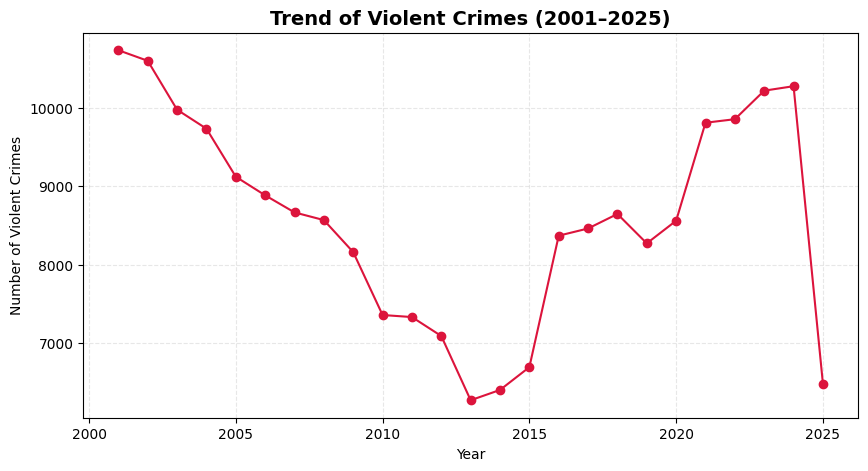

In [88]:
violent_codes = ['01A', '02', '04A']

violent_crimes = crime[crime['FBI Code'].isin(violent_codes)]

trend = violent_crimes['Year'].value_counts().sort_index()

print(trend)
trend.plot(kind='line', marker='o', figsize=(10,5), color='crimson')
plt.title("Trend of Violent Crimes (2001–2025)", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Violent Crimes")
plt.grid(alpha=0.3, linestyle="--")
plt.show()

<hr>
<h2>Question 35: Which specific areas within the selected region of Chicago experienced the highest concentration of crimes, and how do these hotspots compare with surrounding neighborhoods?</h2>

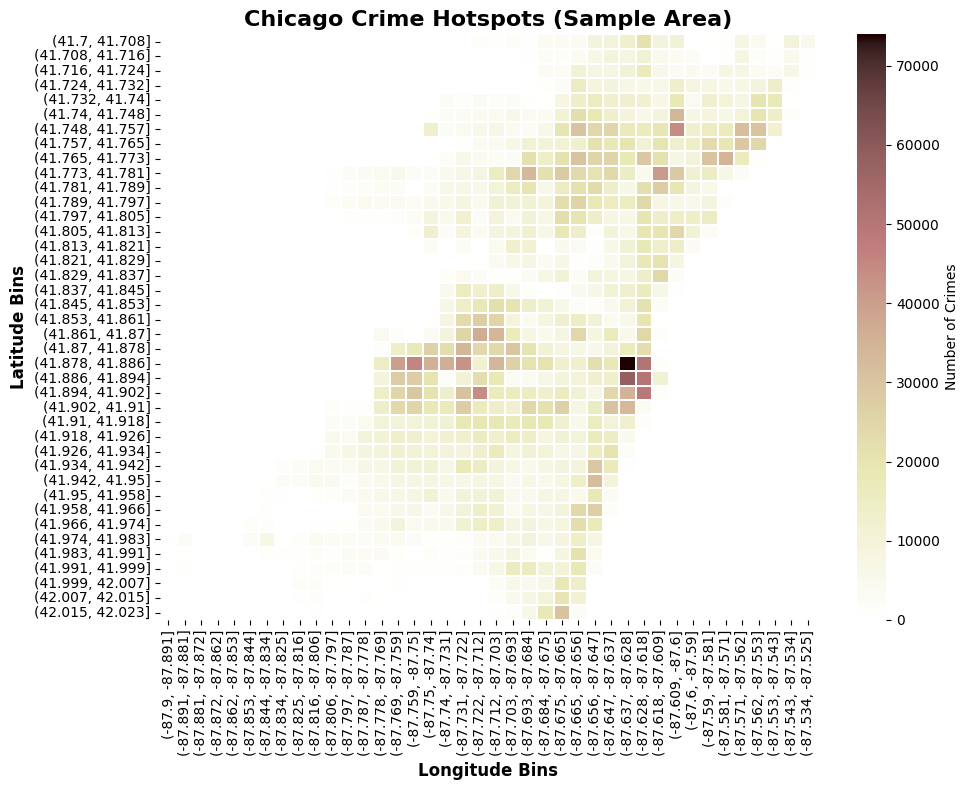

In [89]:
chicago_crime = crime[
    (crime['Latitude'] > 41.7) & (crime['Latitude'] < 42.05) & 
    (crime['Longitude'] > -87.9) & (crime['Longitude'] < -87.5)
]

hotspot_data = chicago_crime.groupby(
    [pd.cut(chicago_crime['Latitude'], 40),
     pd.cut(chicago_crime['Longitude'], 40)]
).size().unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(
    hotspot_data,
    cmap="pink_r",   # reversed pink colormap for hotspots
    linewidths=0.3,
    cbar_kws={'label': 'Number of Crimes'}
)

# Labels
plt.title('Chicago Crime Hotspots (Sample Area)', fontsize=16, weight='bold')
plt.xlabel('Longitude Bins', fontsize=12, weight='bold')
plt.ylabel('Latitude Bins', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()